In [ ]:
# Import libraries
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the CSV file manually

# Read the CSV file
file_name = "Sports_Performance_Injury_Prediction.csv"  # Update with the file name
df = pd.read_csv(file_name)

# Display the first few rows
df.head()

!pip install scikit-learn==1.6.1


Saving Sports_Performance_Injury_Prediction.csv to Sports_Performance_Injury_Prediction.csv


In [ ]:
# Check dataset summary
df.info()

# Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Athlete_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Height_cm                10000 non-null  int64  
 3   Weight_kg                10000 non-null  int64  
 4   Position                 10000 non-null  object 
 5   Experience_years         10000 non-null  int64  
 6   Matches_Played           10000 non-null  int64  
 7   Average_Speed_kmh        10000 non-null  float64
 8   Endurance_Score          10000 non-null  int64  
 9   Strength_Score           10000 non-null  int64  
 10  Agility_Score            10000 non-null  int64  
 11  Reaction_Time_ms         10000 non-null  int64  
 12  Training_Hours_per_Week  10000 non-null  int64  
 13  Rest_Hours_per_Day       10000 non-null  int64  
 14  Diet_Score             

,0
Athlete_ID,0
Age,0
Height_cm,0
Weight_kg,0
Position,0
Experience_years,0
Matches_Played,0
Average_Speed_kmh,0
Endurance_Score,0
Strength_Score,0


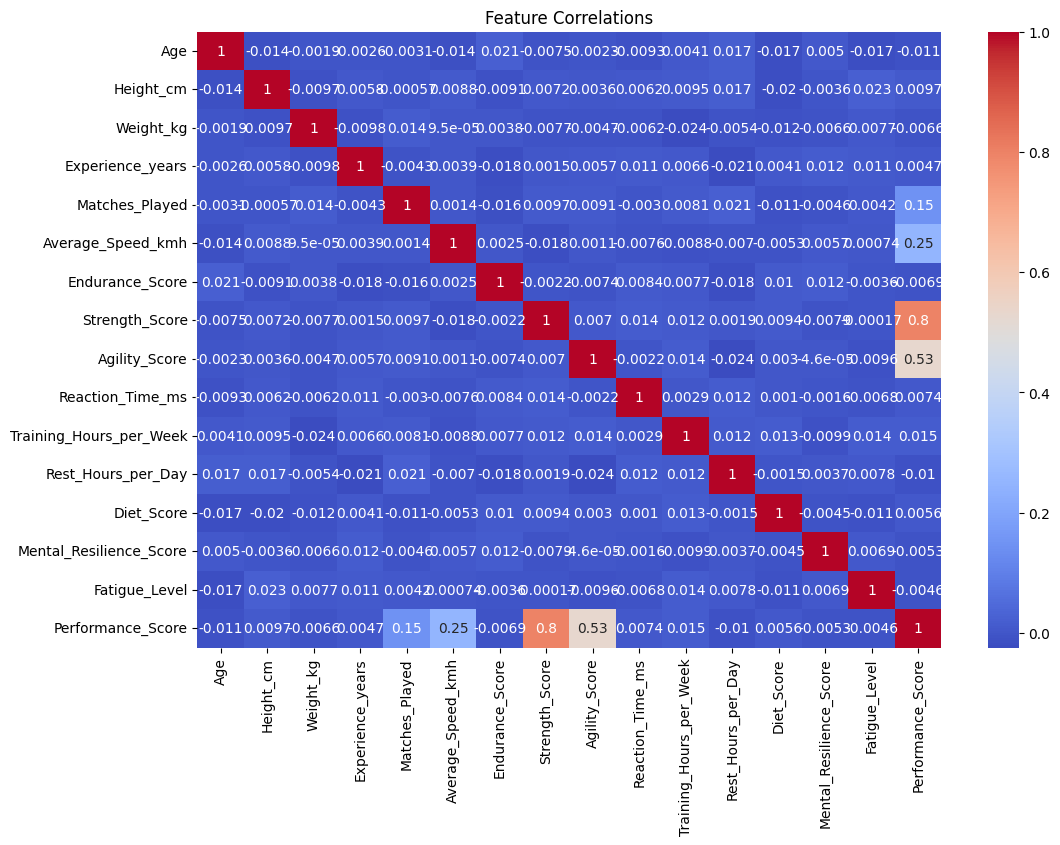

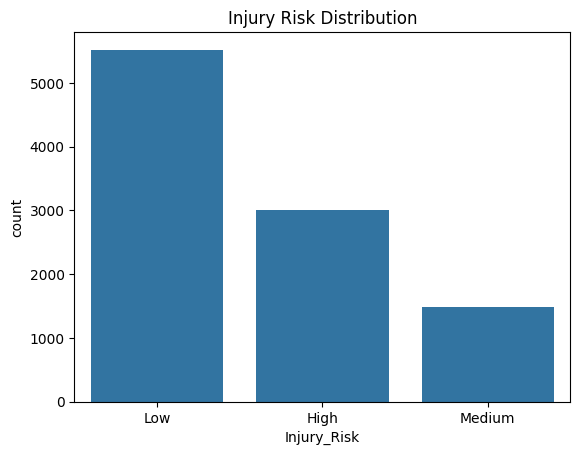

In [ ]:
# Visualize key metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


# Distribution of Injury Risk
sns.countplot(x="Injury_Risk", data=df)
plt.title("Injury Risk Distribution")
plt.show()




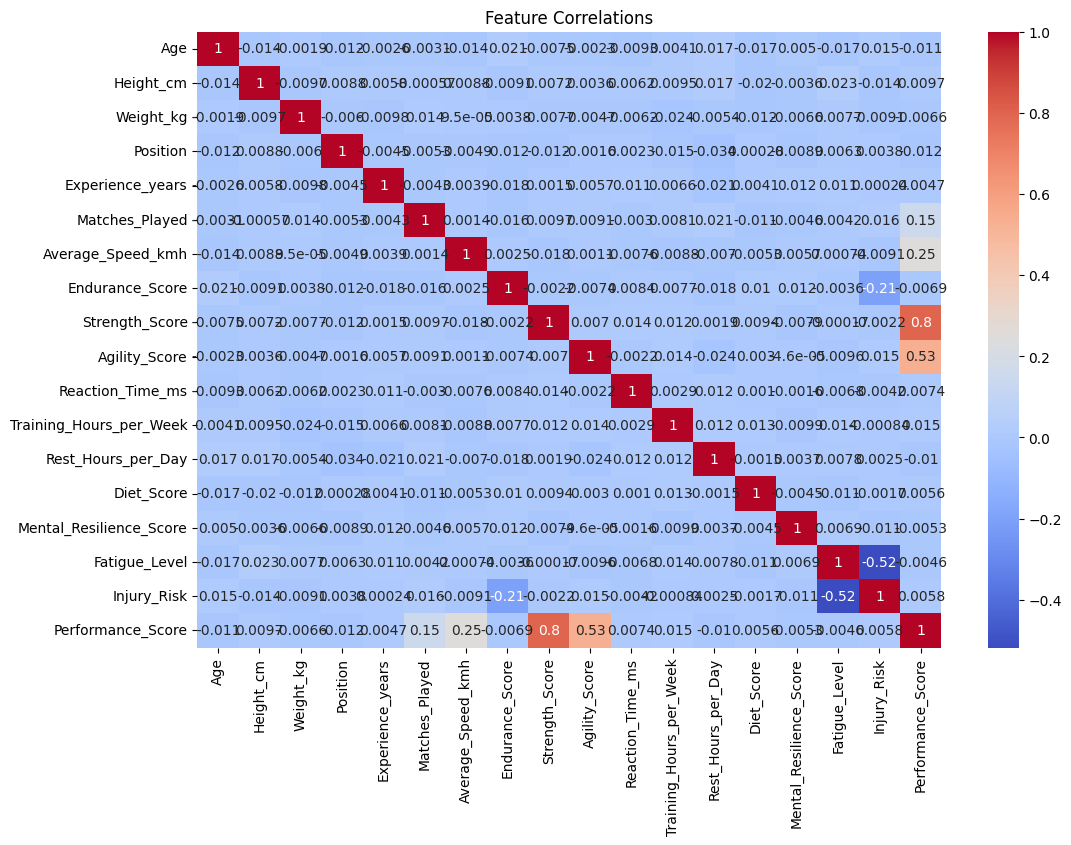

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()
df['Position'] = encoder.fit_transform(df['Position'])  # Encode Position
df['Injury_Risk'] = encoder.fit_transform(df['Injury_Risk'])  # Encode Injury Risk

# Now regenerate the heatmap with all columns
numeric_df = df.drop(columns=["Athlete_ID"])  # Drop only non-relevant string columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


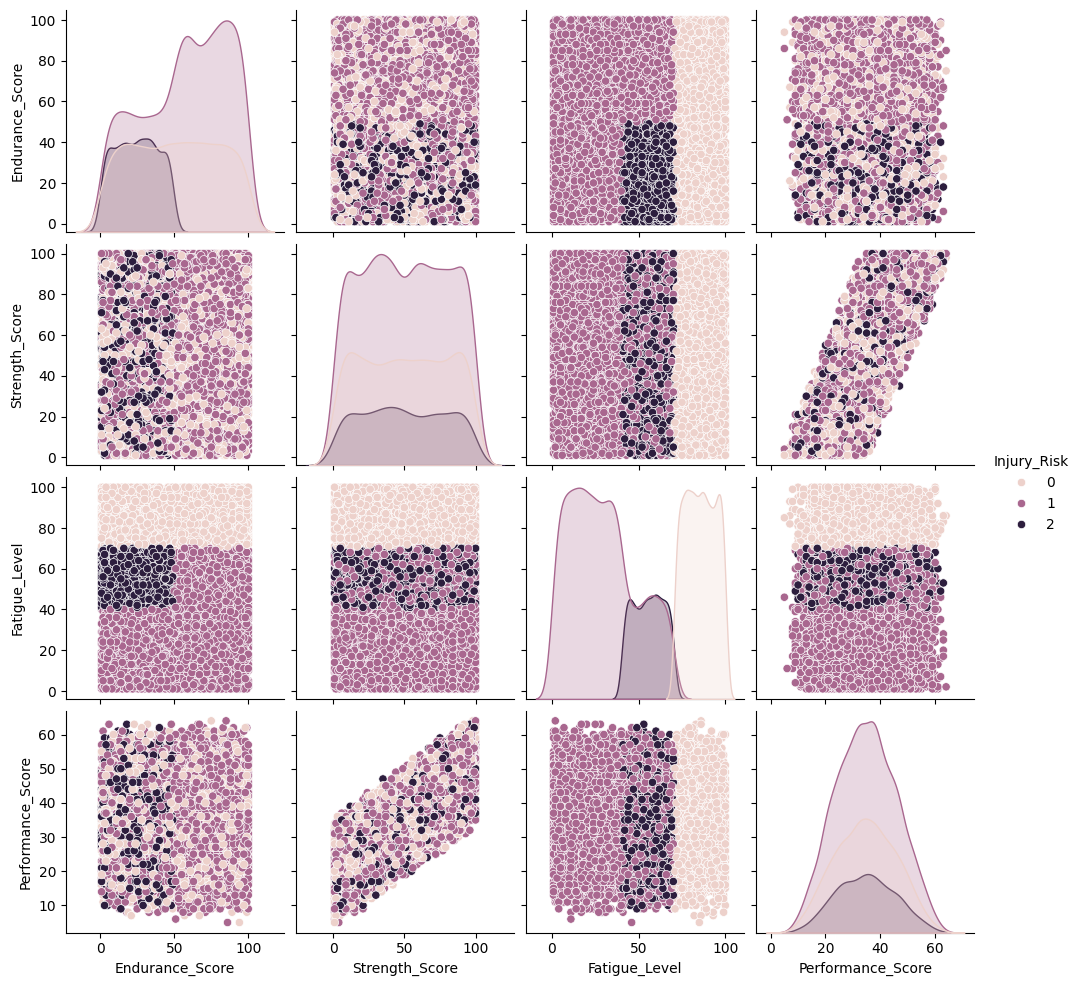

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for key features
sns.pairplot(df, vars=['Endurance_Score', 'Strength_Score', 'Fatigue_Level', 'Performance_Score'], hue="Injury_Risk")
plt.show()


In [ ]:
# Define features and targets
X = df.drop(columns=['Performance_Score', 'Injury_Risk', 'Athlete_ID'])
y_performance = df['Performance_Score']
y_injury = df['Injury_Risk']


In [ ]:
from sklearn.model_selection import train_test_split

# For Performance Score Regression
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X, y_performance, test_size=0.2, random_state=42)

# For Injury Risk Classification
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X, y_injury, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42, n_estimators=100)
regressor.fit(X_train_perf, y_train_perf)

# Make predictions
y_pred_perf = regressor.predict(X_test_perf)

# Evaluate the model
mse = mean_squared_error(y_test_perf, y_pred_perf)
r2 = r2_score(y_test_perf, y_pred_perf)

print("Performance Prediction Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Performance Prediction Model Evaluation:
Mean Squared Error (MSE): 1.01
R2 Score: 0.99


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_injury, y_train_injury)

# Make predictions
y_pred_injury = classifier.predict(X_test_injury)

# Evaluate the model
accuracy = accuracy_score(y_test_injury, y_pred_injury)
print("Injury Risk Prediction Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_injury, y_pred_injury))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_injury, y_pred_injury))


Injury Risk Prediction Model Evaluation:
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00      1126
           2       1.00      1.00      1.00       274

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[ 600    0    0]
 [   0 1126    0]
 [   0    0  274]]


In [ ]:
import joblib

# Save the models
joblib.dump(regressor, "performance_model.pkl")
joblib.dump(classifier, "injury_risk_model.pkl")

print("Models saved successfully!")


Models saved successfully!


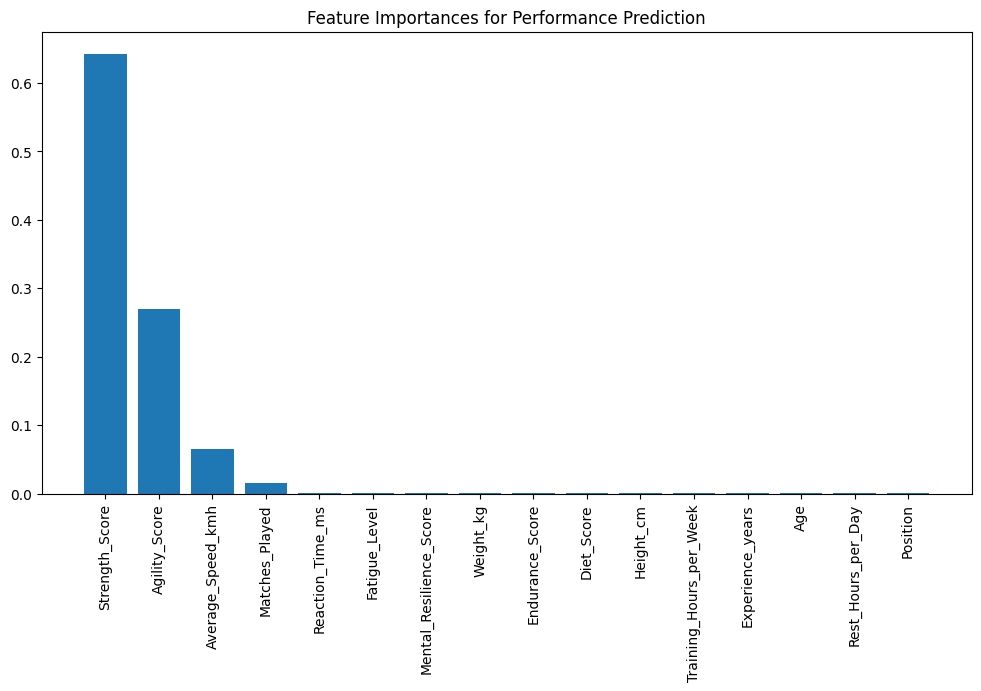

In [ ]:
# Feature Importance for Regression
import matplotlib.pyplot as plt
import numpy as np

importance = regressor.feature_importances_
indices = np.argsort(importance)[::-1]
features = X_train_perf.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Performance Prediction")
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.show()


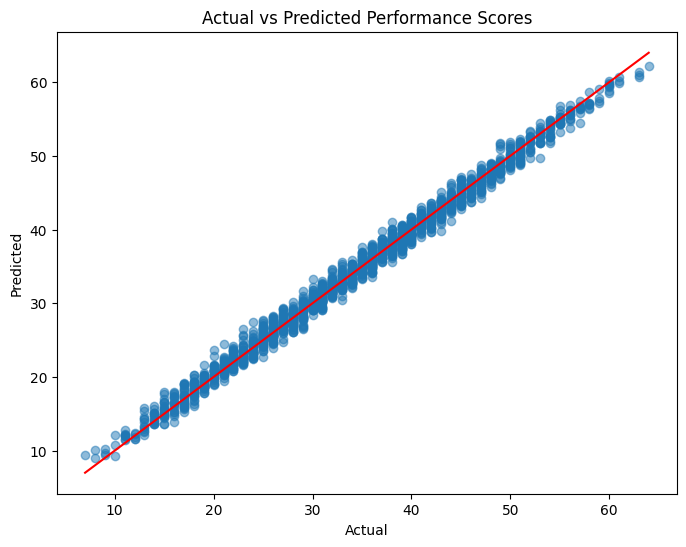

In [ ]:
# Plot Actual vs Predicted Performance Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test_perf, y_pred_perf, alpha=0.5)
plt.plot([min(y_test_perf), max(y_test_perf)], [min(y_test_perf), max(y_test_perf)], color="red")
plt.title("Actual vs Predicted Performance Scores")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for regression
cv_scores_perf = cross_val_score(regressor, X_train_perf, y_train_perf, cv=5, scoring='r2')
print("Cross-Validation R² Scores (Performance Prediction):", cv_scores_perf)

# Cross-validation for classification
cv_scores_injury = cross_val_score(classifier, X_train_injury, y_train_injury, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy (Injury Risk):", cv_scores_injury)


Cross-Validation R² Scores (Performance Prediction): [0.99037759 0.98999341 0.99022875 0.99044069 0.99022463]
Cross-Validation Accuracy (Injury Risk): [1. 1. 1. 1. 1.]


In [ ]:
# Regression Feature Importance
importance = regressor.feature_importances_
for i, feature in enumerate(X_train_perf.columns):
    print(f"{feature}: {importance[i]:.4f}")

# Classification Feature Importance
importance = classifier.feature_importances_
for i, feature in enumerate(X_train_injury.columns):
    print(f"{feature}: {importance[i]:.4f}")


Age: 0.0007
Height_cm: 0.0007
Weight_kg: 0.0008
Position: 0.0003
Experience_years: 0.0007
Matches_Played: 0.0151
Average_Speed_kmh: 0.0644
Endurance_Score: 0.0008
Strength_Score: 0.6429
Agility_Score: 0.2692
Reaction_Time_ms: 0.0008
Training_Hours_per_Week: 0.0007
Rest_Hours_per_Day: 0.0005
Diet_Score: 0.0008
Mental_Resilience_Score: 0.0008
Fatigue_Level: 0.0008
Age: 0.0047
Height_cm: 0.0063
Weight_kg: 0.0063
Position: 0.0020
Experience_years: 0.0053
Matches_Played: 0.0059
Average_Speed_kmh: 0.0080
Endurance_Score: 0.1318
Strength_Score: 0.0070
Agility_Score: 0.0068
Reaction_Time_ms: 0.0072
Training_Hours_per_Week: 0.0059
Rest_Hours_per_Day: 0.0029
Diet_Score: 0.0067
Mental_Resilience_Score: 0.0065
Fatigue_Level: 0.7866


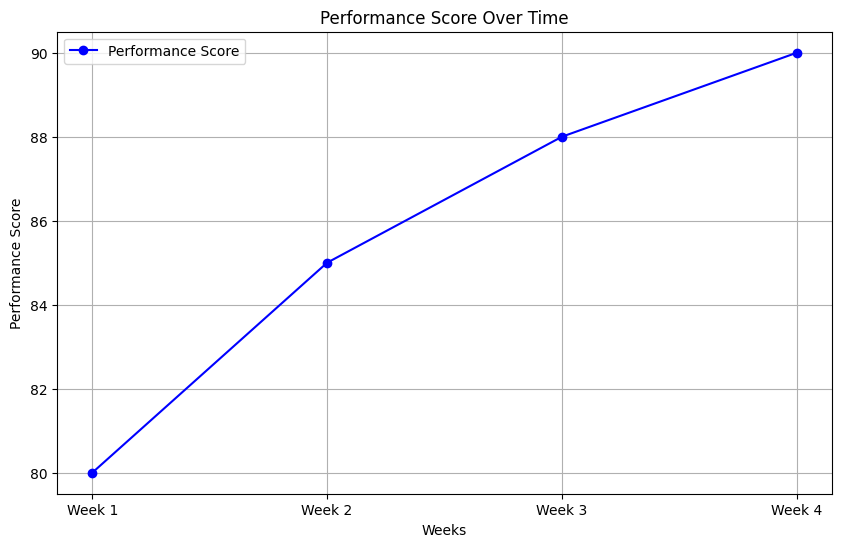

In [ ]:
import matplotlib.pyplot as plt

# Sample data
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
performance_scores = [80, 85, 88, 90]

# Line chart for Performance Score trends
plt.figure(figsize=(10, 6))
plt.plot(weeks, performance_scores, marker='o', color='blue', label='Performance Score')
plt.title('Performance Score Over Time')
plt.xlabel('Weeks')
plt.ylabel('Performance Score')
plt.legend()
plt.grid()
plt.show()

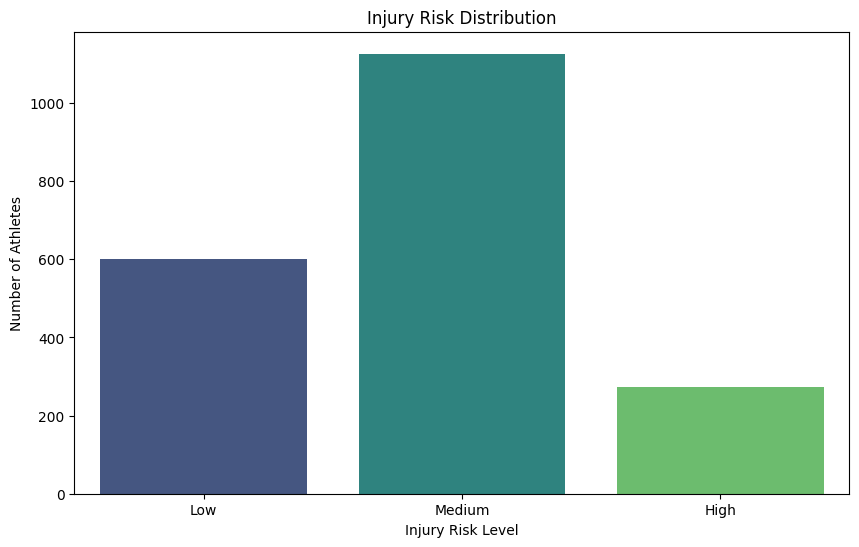

In [ ]:
import seaborn as sns

# Sample data
injury_risks = ['Low', 'Medium', 'High']
counts = [600, 1126, 274]

# Bar chart for Injury Risk Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=injury_risks, y=counts, hue=injury_risks, dodge=False, palette='viridis', legend=False)  # Assign x to hue
plt.title('Injury Risk Distribution')
plt.xlabel('Injury Risk Level')
plt.ylabel('Number of Athletes')
plt.show()


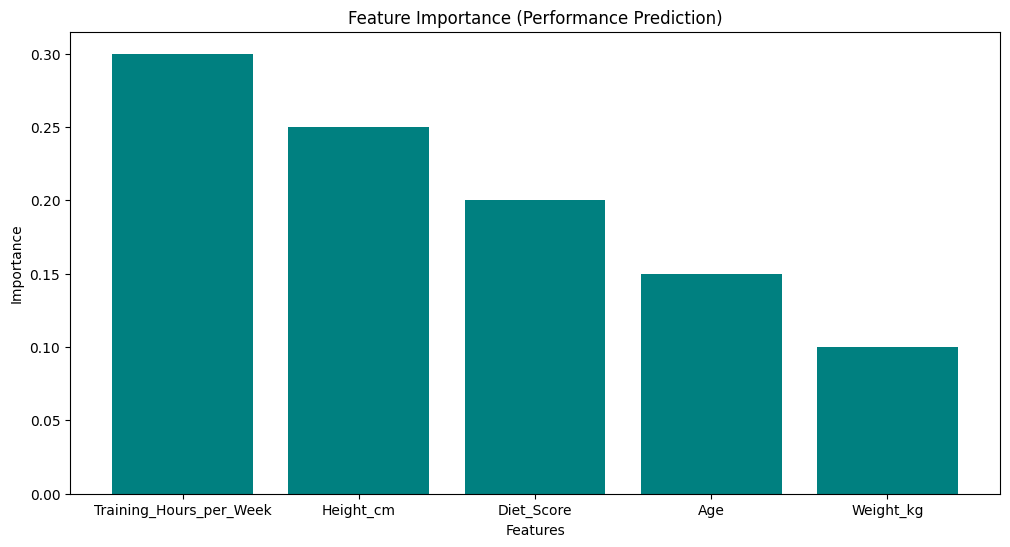

In [ ]:
import numpy as np

# Assuming `importance` is the feature importance from your RandomForestRegressor
features = ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_per_Week', 'Diet_Score']
importance = [0.15, 0.25, 0.1, 0.3, 0.2]

# Bar chart for Feature Importance
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(importance)[::-1]
plt.bar([features[i] for i in sorted_idx], [importance[i] for i in sorted_idx], color='teal')
plt.title('Feature Importance (Performance Prediction)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
import joblib

# Load model
performance_model = joblib.load("performance_model.pkl")
injury_model = joblib.load("injury_risk_model.pkl")

In [ ]:
print(type(performance_model))
print(type(injury_model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
